In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
from scipy.optimize import curve_fit
np.random.seed(110)

In [6]:
# Using https://arxiv.org/pdf/0712.3926.pdf as a reference
Vud = 0.97370 # cabibo
Gf = 1.1663787e-12 # system is in natural units
m_e = 0.511e6 # electron mass energy eV
m_nu=.1
e_charge = -1.602e-19 # electron charge in coulomb
c = 3e8 # lightspeed

E_0 = 18580 # max endpoint energy eV
MEsquare = 1**2 *1**2 + 1.247**2 * 3
Z = 2 # number of nucleons
alpha = 1/137 # Fine structure constant

# Fermi function
def F(E_e):
    eta = Z*alpha*np.sqrt(2*m_e*E_e)/(2*m_e)
    return 2*np.pi*eta/(1-np.exp(-2*np.pi*eta))

# Number of electrons
def N_e(E_e):
    AmpConst = Gf**2*Vud**2/(2*np.pi**3) # constants
    p_e = np.sqrt(2*m_e*E_e) # three momentum magnitude
    N_e = AmpConst*MEsquare*F(E_e)*p_e*(E_0-E_e)*np.sqrt((E_0-E_e)**2-m_nu**2)
    return N_e

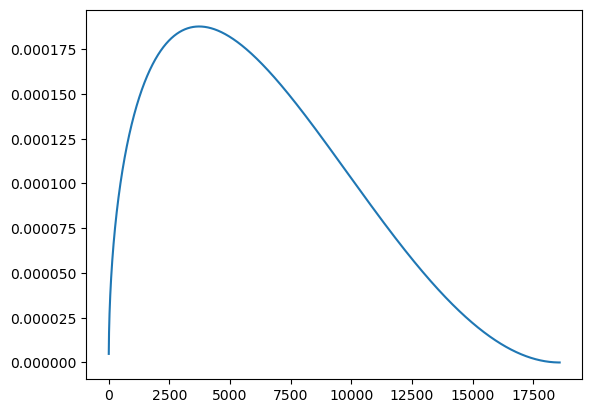

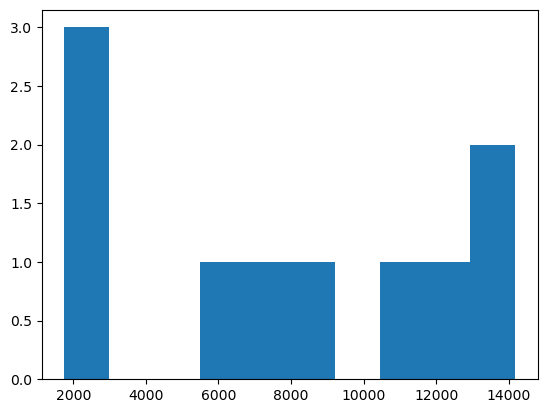

In [23]:
N_sample = 10000
Ne = 10
Ei, Ef = 1, E_0-2*m_nu
Erange = np.linspace(Ei, Ef, N_sample) # kinetic energies
PDF = N_e(Erange)
PDF /= np.sum(PDF)
plt.plot(Erange, PDF)
plt.show()
Pdfhist = np.sort(np.random.choice(Erange, p=PDF, size=Ne))
plt.hist(Pdfhist)
plt.show()

In [24]:
Header = "% Use always SI Units.\n% The momentum(mom) is equivalent to beta * gamma \n% The data need not to be chronological record.\n%\n%Columns: pos_x pos_y pos_z mom_x mom_y mom_z mass charge charge(macro) time"
E_range = Pdfhist # randomly sample distribtution
p_range = np.sqrt((E_range*(E_range+2*m_e))/m_e**2) # KE to p equation respecting normalization
pitch_range = np.pi/2*np.random.rand(Ne)
px_range = p_range*np.cos(pitch_range)
py_range = np.zeros(Ne)
pz_range = p_range*np.sin(pitch_range)
x_range = np.zeros(Ne)
y_range = -p_range/np.sqrt(1-p_range**2)*np.sin(pitch_range)*9.1093837015e-31*c/e_charge
z_range = -60*1e-3*np.ones(Ne)
ExportText = Header + "\n"

for i in range(Ne):
    ExportText += "\n{:.3e}  {:.3e}  {:.3e}   {:.3e}   {:.3e}   {:.3e}  {:.3e}   {:.3e}   {:.3e} {:.3e}".format(
        x_range[i], y_range[i], z_range[i], px_range[i], py_range[i], pz_range[i], 9.1093837e-31, e_charge, e_charge, i*1e-12)
        
print(ExportText)

% Use always SI Units.
% The momentum(mom) is equivalent to beta * gamma 
% The data need not to be chronological record.
%
%Columns: pos_x pos_y pos_z mom_x mom_y mom_z mass charge charge(macro) time

0.000e+00  5.346e-05  -6.000e-02   7.685e-02   0.000e+00   3.123e-02  9.109e-31   -1.602e-19   -1.602e-19 0.000e+00
0.000e+00  1.374e-04  -6.000e-02   6.685e-02   0.000e+00   8.009e-02  9.109e-31   -1.602e-19   -1.602e-19 1.000e-12
0.000e+00  1.793e-04  -6.000e-02   1.501e-02   0.000e+00   1.045e-01  9.109e-31   -1.602e-19   -1.602e-19 2.000e-12
0.000e+00  1.928e-04  -6.000e-02   9.597e-02   0.000e+00   1.118e-01  9.109e-31   -1.602e-19   -1.602e-19 3.000e-12
0.000e+00  1.870e-04  -6.000e-02   1.375e-01   0.000e+00   1.079e-01  9.109e-31   -1.602e-19   -1.602e-19 4.000e-12
0.000e+00  3.181e-04  -6.000e-02   3.232e-02   0.000e+00   1.832e-01  9.109e-31   -1.602e-19   -1.602e-19 5.000e-12
0.000e+00  9.386e-05  -6.000e-02   2.011e-01   0.000e+00   5.382e-02  9.109e-31   -1.602e-19   -1.602e